In [ ]:
from pandas.core.groupby.groupby import F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import math 
from sklearn.mixture import GaussianMixture
import seaborn as sns

def KDE(F):
  kernel = scipy.stats.gaussian_kde(F)
  min, max = F.min(), F.max()
  x = np.linspace(min, max, len(data))
  kde_values = kernel(x)
  return x , kde_values

def mad(df):
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()
    
    return k * np.median(np.fabs(df - median))

def GetParams(F):
    mean = F.mean()
    variance = F.var()
    std =  F.std()
    median = F.median()
    trimmed_mean = scipy.stats.trim_mean(F, proportiontocut=0.1)
    mad_value = mad(F)

    norm_q95 = scipy.stats.norm.ppf(0.95)
    mean_conf = norm_q95 * std / np.sqrt(len(data))

    chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df = len(data)-1)
    chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df = len(data)-1)

    var_conf_left = variance * (len(data) - 1) / chi2_q95_left
    var_conf_right = variance * (len(data) - 1) / chi2_q95_right
    std_conf_left = np.sqrt(var_conf_left)
    std_conf_right = np.sqrt(var_conf_right)  
    para = [mean, mean_conf, variance, var_conf_left, var_conf_right, 
            std, std_conf_left, std_conf_right, median, trimmed_mean, mad_value]
    return para

def no_tails(array):
    array_cut = []
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25
    
    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)
    
    for data in array:
        if data < max_dist and data > min_dist:
            array_cut.append(data)
    return array_cut

def Display(N, para):
    print(f"{N} data statistics\n Average: (%0.3f +/- %0.3f)\n" % (para[0], para[1]), 
          "Variance: (%0.3f; %0.3f; %0.3f)\n" % (para[3], para[2], para[4]),
          "Standard deviation: (%0.3f; %0.3f; %0.3f)\n" % (para[6], para[5], para[7]),
          "Median : (%0.3f)\n"%(para[8]), "Truncated mean: (%0.3f)\n"%(para[9]))  

data = pd.read_csv('/content/drive/MyDrive/Maltivariate/continuous dataset.csv', delimiter = ',', header = 0, 
                   index_col = False, infer_datetime_format=True)
data = data.sample(n = 500, random_state = 41)
#print(data.head())
TQL_san, W2M_toc, TQL_dav, W2M_dav = GetParams(data['TQL_san']),GetParams(data['W2M_toc']), GetParams(data['TQL_dav']), GetParams(data['W2M_dav'])
    
Display('TQL_san', TQL_san)
Display('W2M_toc', W2M_toc)
Display('TQL_dav', TQL_dav)
Display('W2M_dav', W2M_dav)

TQL_san data statistics
 Average: (0.107 +/- 0.006)
 Variance: (0.007; 0.008; 0.009)
 Standard deviation: (0.082; 0.087; 0.093)
 Median : (0.087)
 Truncated mean: (0.096)

W2M_toc data statistics
 Average: (12.974 +/- 0.521)
 Variance: (44.434; 50.114; 56.964)
 Standard deviation: (6.666; 7.079; 7.547)
 Median : (12.201)
 Truncated mean: (12.600)

TQL_dav data statistics
 Average: (0.144 +/- 0.006)
 Variance: (0.006; 0.007; 0.008)
 Standard deviation: (0.079; 0.084; 0.089)
 Median : (0.132)
 Truncated mean: (0.138)

W2M_dav data statistics
 Average: (3.590 +/- 0.124)
 Variance: (2.509; 2.829; 3.216)
 Standard deviation: (1.584; 1.682; 1.793)
 Median : (3.345)
 Truncated mean: (3.500)



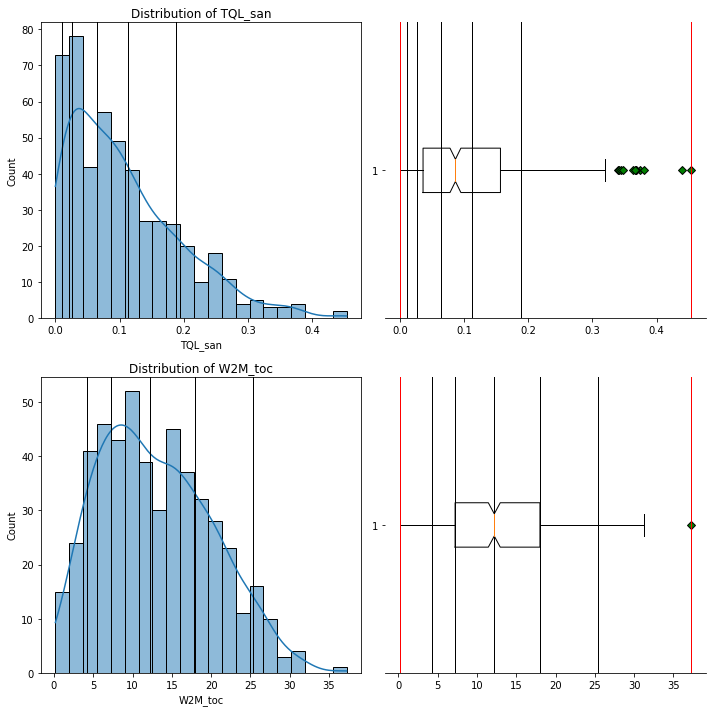

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(10,10), tight_layout = True)

green_diamond = dict(markerfacecolor='g', marker='D')
quant = data['TQL_toc'].quantile([.1, .25, .5, .75, .95])
quant2 = data['W2M_toc'].quantile([.1, .25, .5, .75, .95])

sns.histplot(data=data['TQL_san'],kde = True, bins = int(1+3.32*math.log(len(data))),ax=ax[0][0])
ax[0][0].axvline(x=quant[0.10], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.25], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.50], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.75], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.95], color = 'black', linewidth=1)
ax[0][0].set_xlabel("TQL_san")
ax[0][0].set_title("Distribution of TQL_san")

ax[0][1].boxplot(data['TQL_san'], vert = False, notch = True, flierprops =green_diamond)
ax[0][1].axvline(x=min(data['TQL_san']), color = 'red', linewidth=1)
ax[0][1].axvline(x=max(data['TQL_san']), color = 'red', linewidth=1)
ax[0][1].axvline(x=quant[0.10], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.25], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.50], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.75], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.95], color = 'black', linewidth=1)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)

sns.histplot(data=data['W2M_toc'],kde = True, bins = int(1+3.32*math.log(len(data))), ax=ax[1][0])
ax[1][0].axvline(x=quant2[0.10], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.25], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.50], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.75], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.95], color = 'black', linewidth=1)
ax[1][0].set_xlabel("W2M_toc")
ax[1][0].set_title("Distribution of W2M_toc")

ax[1][1].boxplot(data['W2M_toc'], vert = False, notch = True, flierprops =green_diamond)
ax[1][1].axvline(x=min(data['W2M_toc']), color = 'red', linewidth=1)
ax[1][1].axvline(x=max(data['W2M_toc']), color = 'red', linewidth=1)
ax[1][1].axvline(x=quant2[0.10], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.25], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.50], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.75], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.95], color = 'black', linewidth=1)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)

fig.show()
fig.savefig('./plot1.png')

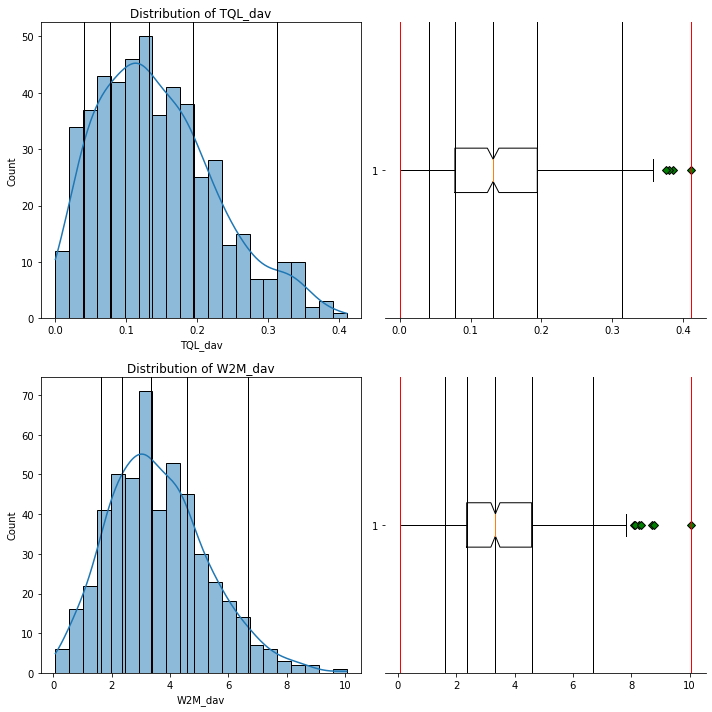

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(10,10),  tight_layout = True)
quant3 = data['TQL_dav'].quantile([.1, .25, .5, .75, .95])
quant4 = data['W2M_dav'].quantile([.1, .25, .5, .75, .95])


sns.histplot(data=data['TQL_dav'], kde = True, bins = int(1+3.32*math.log(len(data))), ax=ax[0][0])
ax[0][0].axvline(x=quant3[0.10], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.25], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.50], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.75], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.95], color = 'black', linewidth=1)
ax[0][0].set_xlabel("TQL_dav")
ax[0][0].set_title("Distribution of TQL_dav")

ax[0][1].boxplot(data['TQL_dav'], vert = False, notch = True, flierprops =green_diamond)
ax[0][1].axvline(x=min(data['TQL_dav']), color = 'red', linewidth=1)
ax[0][1].axvline(x=max(data['TQL_dav']), color = 'red', linewidth=1)
ax[0][1].axvline(x=quant3[0.10], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.25], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.50], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.75], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.95], color = 'black', linewidth=1)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)

sns.histplot(data=data['W2M_dav'], kde = True, bins = int(1+3.32*math.log(len(data))), ax=ax[1][0])
ax[1][0].axvline(x=quant4[0.10], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.25], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.50], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.75], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.95], color = 'black', linewidth=1)
ax[1][0].set_xlabel("W2M_dav")
ax[1][0].set_title("Distribution of W2M_dav")

ax[1][1].boxplot(data['W2M_dav'], vert = False, notch = True,  flierprops =green_diamond)
ax[1][1].axvline(x=min(data['W2M_dav']), color = 'red', linewidth=1)
ax[1][1].axvline(x=max(data['W2M_dav']), color = 'red', linewidth=1)
ax[1][1].axvline(x=quant4[0.10], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.25], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.50], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.75], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.95], color = 'black', linewidth=1)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)

fig.show()
fig.savefig('./plot2.png')

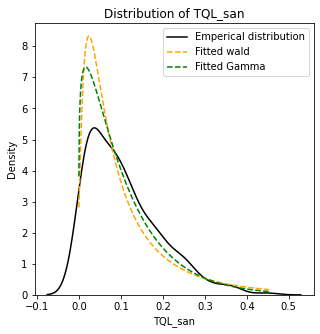

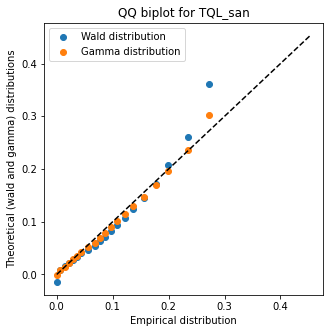

Results of Kolmogorov and CramerVonMises tests for TQL_san (wald): (0.001514;0.005265)
Results of Kolmogorov and CramerVonMises tests for TQL_san (gamma): (0.137882;0.158122)


In [ ]:
params_0 = scipy.stats.wald.fit(data['TQL_san'])
params_1 = scipy.stats.gamma.fit(data['TQL_san'])
x = np.linspace(np.min(data['TQL_san']),np.max(data['TQL_san']),len(data['TQL_san']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['TQL_san'], color = 'black', label = 'Emperical distribution')
plt.plot(x,scipy.stats.wald.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted wald')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma')
plt.xlabel("TQL_san")
plt.title("Distribution of TQL_san")
plt.legend(loc="upper right")
plt.show()
f.savefig('./plot3.png')

params1 = scipy.stats.wald.fit(data['TQL_san'])
params2 = scipy.stats.gamma.fit(data['TQL_san'])
percs = np.linspace(0, 100, 21)
qn = np.percentile(data['TQL_san'], percs)
qnt_1 = scipy.stats.wald.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['TQL_san']), np.max(data['TQL_san']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn, qnt_1, ls="", marker="o", markersize=6, label = 'Wald distribution')
plt.plot(qn, qnt_2, ls="", marker="o", markersize=6, label = 'Gamma distribution')
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for TQL_san')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (wald and gamma) distributions')
plt.legend(loc = 'upper left')
plt.show()
f.savefig('./plot4.png')

p1_1 = scipy.stats.kstest(data['TQL_san'], 'wald', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data['TQL_san'], 'wald', params1).pvalue
p2_1 = scipy.stats.kstest(data['TQL_san'], 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data['TQL_san'], 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for TQL_san (wald): (%0.6f;%0.6f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for TQL_san (gamma): (%0.6f;%0.6f)'%(p2_1, p2_2))

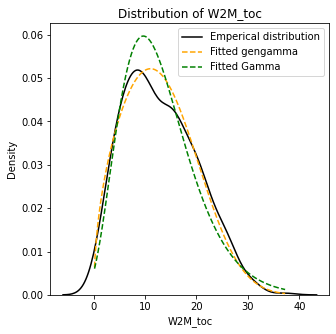

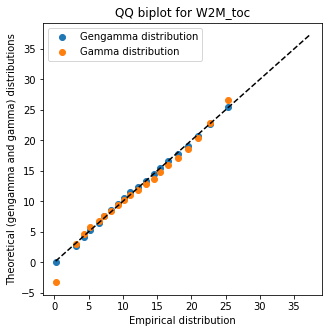

Results of Kolmogorov and CramerVonMises tests for W2M_toc (gengamma): (0.501201;0.694448)
Results of Kolmogorov and CramerVonMises tests for W2M_toc (gamma): (0.102044;0.221539)


In [ ]:
params_0 = scipy.stats.gengamma.fit(data['W2M_toc'])
params_1 = scipy.stats.gamma.fit(data['W2M_toc'])
x = np.linspace(np.min(data['W2M_toc']),np.max(data['W2M_toc']),len(data['W2M_toc']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['W2M_toc'], color = 'black', label = 'Emperical distribution')
plt.plot(x,scipy.stats.gengamma.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted gengamma')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma')
plt.xlabel("W2M_toc")
plt.title("Distribution of W2M_toc")
plt.legend(loc="upper right")
plt.show()
f.savefig('./plot5.png')

params1 = scipy.stats.gengamma.fit(data['W2M_toc'])
params2 = scipy.stats.gamma.fit(data['W2M_toc'])
percs = np.linspace(0, 100, 21)
qn = np.percentile(data['W2M_toc'], percs)
qnt_1 = scipy.stats.gengamma.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['W2M_toc']), np.max(data['W2M_toc']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn, qnt_1, ls="", marker="o", markersize=6, label = 'Gengamma distribution')
plt.plot(qn, qnt_2, ls="", marker="o", markersize=6, label = 'Gamma distribution')
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for W2M_toc')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gengamma and gamma) distributions')
plt.legend(loc = 'upper left')
plt.show()
f.savefig('./plot6.png')

p1_1 = scipy.stats.kstest(data['W2M_toc'], 'gengamma', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data['W2M_toc'], 'gengamma', params1).pvalue
p2_1 = scipy.stats.kstest(data['W2M_toc'], 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data['W2M_toc'], 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for W2M_toc (gengamma): (%0.6f;%0.6f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for W2M_toc (gamma): (%0.6f;%0.6f)'%(p2_1, p2_2))

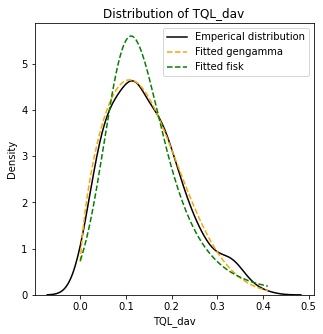

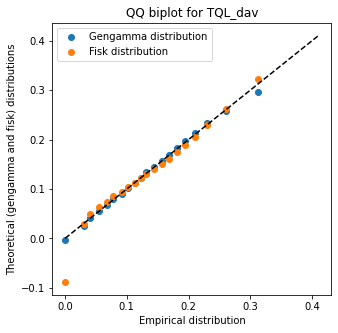

Results of Kolmogorov and CramerVonMises tests for TQL_dav (gengamma): (0.995188;0.988753)
Results of Kolmogorov and CramerVonMises tests for TQL_dav (fisk): (0.229682;0.305408)


In [ ]:
params_0 = scipy.stats.gengamma.fit(data['TQL_dav'])
params_1 = scipy.stats.fisk.fit(data['TQL_dav'])
x = np.linspace(np.min(data['TQL_dav']),np.max(data['TQL_dav']),len(data['TQL_dav']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['TQL_dav'], color = 'black', label = 'Emperical distribution')
plt.plot(x,scipy.stats.gengamma.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted gengamma')
plt.plot(x,scipy.stats.fisk.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted fisk')
plt.xlabel("TQL_dav")
plt.title("Distribution of TQL_dav")
plt.legend(loc="upper right")
plt.show()
f.savefig('./plot7.png')

params1 = scipy.stats.gengamma.fit(data['TQL_dav'])
params2 = scipy.stats.fisk.fit(data['TQL_dav'])
percs = np.linspace(0, 100, 21)
qn = np.percentile(data['TQL_dav'], percs)
qnt_1 = scipy.stats.gengamma.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.fisk.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['TQL_dav']), np.max(data['TQL_dav']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn, qnt_1, ls="", marker="o", markersize=6, label = 'Gengamma distribution')
plt.plot(qn, qnt_2, ls="", marker="o", markersize=6, label = 'Fisk distribution')
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for TQL_dav')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gengamma and fisk) distributions')
plt.legend(loc = 'upper left')
plt.show()
f.savefig('./plot8.png')

p1_1 = scipy.stats.kstest(data['TQL_dav'], 'gengamma', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data['TQL_dav'], 'gengamma', params1).pvalue
p2_1 = scipy.stats.kstest(data['TQL_dav'], 'fisk', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data['TQL_dav'], 'fisk', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for TQL_dav (gengamma): (%0.6f;%0.6f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for TQL_dav (fisk): (%0.6f;%0.6f)'%(p2_1, p2_2))

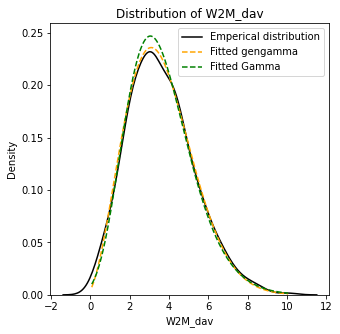

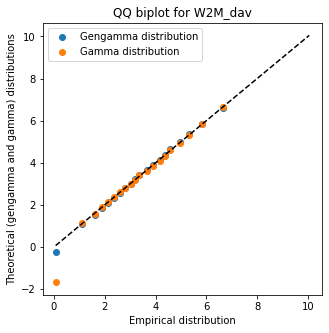

Results of Kolmogorov and CramerVonMises tests for W2M_dav (gengamma): (0.961954;0.988942)
Results of Kolmogorov and CramerVonMises tests for W2M_dav (gamma): (0.899434;0.987741)


In [ ]:
params_0 = scipy.stats.gengamma.fit(data['W2M_dav'])
params_1 = scipy.stats.gamma.fit(data['W2M_dav'])
x = np.linspace(np.min(data['W2M_dav']),np.max(data['W2M_dav']),len(data['W2M_dav']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['W2M_dav'], color = 'black', label = 'Emperical distribution')
plt.plot(x,scipy.stats.gengamma.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted gengamma')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma')
plt.xlabel("W2M_dav")
plt.title("Distribution of W2M_dav")
plt.legend(loc="upper right")
plt.show()
f.savefig('./plot9.png')

params1 = scipy.stats.gengamma.fit(data['W2M_dav'])
params2 = scipy.stats.gamma.fit(data['W2M_dav'])
percs = np.linspace(0, 100, 21)
qn = np.percentile(data['W2M_dav'], percs)
qnt_1 = scipy.stats.gengamma.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['W2M_dav']), np.max(data['W2M_dav']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn, qnt_1, ls="", marker="o", markersize=6, label = 'Gengamma distribution')
plt.plot(qn, qnt_2, ls="", marker="o", markersize=6, label = 'Gamma distribution')
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for W2M_dav')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gengamma and gamma) distributions')
plt.legend(loc = 'upper left')
plt.show()
f.savefig('./plot10.png')

p1_1 = scipy.stats.kstest(data['W2M_dav'], 'gengamma', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data['W2M_dav'], 'gengamma', params1).pvalue
p2_1 = scipy.stats.kstest(data['W2M_dav'], 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data['W2M_dav'], 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for W2M_dav (gengamma): (%0.6f;%0.6f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for W2M_dav (gamma): (%0.6f;%0.6f)'%(p2_1, p2_2))